In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
import random
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('D:\MS sem2\DM\Main_Project\sklearn\Arrhythmia\cleaned_arythmia.csv')
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,269,270,271,272,273,275,276,277,278,279
0,0,75,0,190,80,91,193,371,174,121,...,-0.3,0.0,9.0,-0.9,0.0,0.9,2.9,23.3,49.4,8
1,1,56,1,165,64,81,174,401,149,39,...,-0.5,0.0,8.5,0.0,0.0,0.2,2.1,20.4,38.8,6
2,2,54,0,172,95,138,163,386,185,102,...,0.9,0.0,9.5,-2.4,0.0,0.3,3.4,12.3,49.0,10
3,3,55,0,175,94,100,202,380,179,143,...,0.1,0.0,12.2,-2.2,0.0,0.4,2.6,34.6,61.6,1
4,4,75,0,190,80,88,181,360,177,103,...,-0.4,0.0,13.1,-3.6,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,447,53,1,160,70,80,199,382,154,117,...,0.0,0.0,4.3,-5.0,0.0,0.7,0.6,-4.4,-0.5,1
448,448,37,0,190,85,100,137,361,201,73,...,-0.5,0.0,15.6,-1.6,0.0,0.4,2.4,38.0,62.4,10
449,449,36,0,166,68,108,176,365,194,116,...,1.2,0.0,16.3,-28.6,0.0,1.5,1.0,-44.2,-33.2,2
450,450,32,1,155,55,93,106,386,218,63,...,0.2,-0.4,12.0,-0.7,0.0,0.5,2.4,25.0,46.6,1


In [6]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_norm = scaler.fit(X)
X_norm = scaler.transform(X)
X_norm_df = pd.DataFrame(X_norm)
X_norm_df

,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,261
0,0.000000,0.903614,0.0,0.125926,0.435294,0.270677,0.368321,0.501805,0.241758,0.590244,...,0.660574,0.638554,1.000000,0.381356,0.968531,0.0,0.53125,0.741667,0.507519,0.569579
1,0.002217,0.674699,1.0,0.088889,0.341176,0.195489,0.332061,0.610108,0.150183,0.190244,...,0.558747,0.614458,1.000000,0.360169,1.000000,0.0,0.31250,0.675000,0.485714,0.500971
2,0.004435,0.650602,0.0,0.099259,0.523529,0.624060,0.311069,0.555957,0.282051,0.497561,...,0.583812,0.783133,1.000000,0.402542,0.916084,0.0,0.34375,0.783333,0.424812,0.566990
3,0.006652,0.662651,0.0,0.103704,0.517647,0.338346,0.385496,0.534296,0.260073,0.697561,...,0.687206,0.686747,1.000000,0.516949,0.923077,0.0,0.37500,0.716667,0.592481,0.648544
4,0.008869,0.903614,0.0,0.125926,0.435294,0.248120,0.345420,0.462094,0.252747,0.502439,...,0.587467,0.626506,1.000000,0.555085,0.874126,0.0,0.21875,0.825000,0.523308,0.656311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,0.991131,0.638554,1.0,0.081481,0.376471,0.187970,0.379771,0.541516,0.168498,0.570732,...,0.328982,0.674699,1.000000,0.182203,0.825175,0.0,0.46875,0.550000,0.299248,0.246602
448,0.993348,0.445783,0.0,0.125926,0.464706,0.338346,0.261450,0.465704,0.340659,0.356098,...,0.762924,0.614458,1.000000,0.661017,0.944056,0.0,0.37500,0.700000,0.618045,0.653722
449,0.995565,0.433735,0.0,0.090370,0.364706,0.398496,0.335878,0.480144,0.315018,0.565854,...,0.000000,0.819277,1.000000,0.690678,0.000000,0.0,0.71875,0.583333,0.000000,0.034951
450,0.997783,0.385542,1.0,0.074074,0.288235,0.285714,0.202290,0.555957,0.402930,0.307317,...,0.650653,0.698795,0.902439,0.508475,0.975524,0.0,0.40625,0.700000,0.520301,0.551456


In [8]:
X = X.drop(columns = ['Unnamed: 0'], axis = 1)
X

,0,1,2,3,4,5,6,7,8,9,...,268,269,270,271,272,273,275,276,277,278
0,75,0,190,80,91,193,371,174,121,-16,...,62.9,-0.3,0.0,9.0,-0.9,0.0,0.9,2.9,23.3,49.4
1,56,1,165,64,81,174,401,149,39,25,...,43.4,-0.5,0.0,8.5,0.0,0.0,0.2,2.1,20.4,38.8
2,54,0,172,95,138,163,386,185,102,96,...,48.2,0.9,0.0,9.5,-2.4,0.0,0.3,3.4,12.3,49.0
3,55,0,175,94,100,202,380,179,143,28,...,68.0,0.1,0.0,12.2,-2.2,0.0,0.4,2.6,34.6,61.6
4,75,0,190,80,88,181,360,177,103,-16,...,48.9,-0.4,0.0,13.1,-3.6,0.0,-0.1,3.9,25.4,62.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,-0.6,0.0,0.0,4.3,-5.0,0.0,0.7,0.6,-4.4,-0.5
448,37,0,190,85,100,137,361,201,73,86,...,82.5,-0.5,0.0,15.6,-1.6,0.0,0.4,2.4,38.0,62.4
449,36,0,166,68,108,176,365,194,116,-85,...,-63.6,1.2,0.0,16.3,-28.6,0.0,1.5,1.0,-44.2,-33.2
450,32,1,155,55,93,106,386,218,63,54,...,61.0,0.2,-0.4,12.0,-0.7,0.0,0.5,2.4,25.0,46.6


## Phase 1

#### Input: Feature Set F = (f1, f2, f3, ...., fD). Class Labels y.
#### Output: Strong releveant features

In [9]:
import math

def entropy(values):
    probabilities = [float(values.count(value)) / len(values) for value in set(values)]
    return - sum([p * math.log2(p) for p in probabilities])

def joint_entropy(X, Y):
    XY = list(zip(X, Y))
    return entropy(XY)

def conditional_entropy(X, Y):
    return joint_entropy(X, Y) - entropy(Y)

def symmetric_uncertainty(X, Y):
    HX = entropy(X)
    HY = entropy(Y)
    HXY = joint_entropy(X, Y)
    HX_given_Y = conditional_entropy(X, Y)
    return (2 * HX - HX_given_Y) / (HX + HY)

In [51]:
# rho=
F_strong = list()
score_list =[]
for itr, col in enumerate(X_norm_df.columns):
    score = symmetric_uncertainty(X_norm_df[col].tolist(), y.tolist())
    F_strong.append((col, score))
    score_list.append(score)
# print(len(F_strong)+ "before")

print("{} before".format(len(F_strong)))
Su_max= max(score_list)
# Su_max
# SU_D = sum(score_list) - Su_max

D = len(X_norm_df.columns)
SU_D= D / math.log2(D)
SU_D=round(SU_D)
ith=[]
print(F_strong[SU_D])
for i,j in F_strong:
    if i== round(SU_D):
        ith.append(j)
        # print(j)
# print(ith)
rho= min(0.1* Su_max,ith[0])
# print(rho)

F_strong_1=[]
for itr, col in enumerate(X_norm_df.columns):
    score = symmetric_uncertainty(X_norm_df[col].tolist(), y.tolist())
    if score>= rho:
        F_strong_1.append((col, score))
    score_list.append(score)
# print(len(F_strong) +"after")
print("{} after".format(len(F_strong_1)))
# F_strong_1

262 before
(33, 0.0852032889932509)
177 after


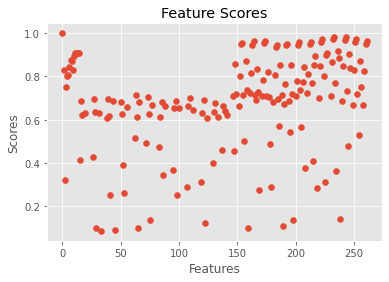

In [52]:
import matplotlib.pyplot as plt

features = [x[0] for x in F_strong_1]
scores = [x[1] for x in F_strong_1]

plt.scatter(features, scores)
plt.xlabel('Features')
plt.ylabel('Scores')
plt.title('Feature Scores')

plt.show()

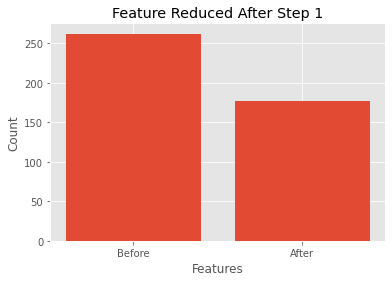

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.bar(['Before', 'After'], [len(F_strong), len(F_strong_1)])

# Set the axis labels and title
plt.xlabel('Features')
plt.ylabel('Count')
plt.title('Feature Reduced After Step 1')

# Show the plot
plt.show()

In [55]:
F_strong_1.sort(key=lambda a: a[1], reverse = True)
len(F_strong_1)

177

## Phase 2
#### Input: F_strong
#### Output: M Feature Clusters

In [60]:
U0 = F_strong_1.copy()
clusters = dict()
k = 1
dt_max = U0[0][1] - U0[-1][1]
D_star = len(U0)
rho1 = (dt_max*math.log2(D_star))/D_star
print(f"rho1 = {rho1}")

rho1 = 0.03859514687181735


In [61]:
while True:
    U1 = U0.copy()
    clusters[k] = list()
    clusters[k].append(U0[0])
    # print(clusters)
    
    #removing clusters having weak correlation with the top feature(f1) in U1
    for i in range(1, len(U1)):
        difference = U0[0][1] - U0[i][1]
        if difference > rho1:
            U1.remove(U0[i])
    
    #Finding similar features to f1(to-feature) and storing them to the cluster-K
    for i in range(1, len(U1)):
        if symmetric_uncertainty(X_norm_df[U1[0][0]].tolist(), X_norm_df[U1[i][0]].tolist()) >= min(U1[0][1], U1[i][1]):
            clusters[k].append(U1[i])
    
    #updating the U0
    for values in clusters[k]:
        U0.remove(values)
    
    #checking the stopping criteria
    if len(U0) > 1:
        k += 1
    else:
        break

In [66]:
clusters

{1: [(0, 1.0),
  (243, 0.9846326225018346),
  (233, 0.9817220243235594),
  (223, 0.9743042298753847),
  (232, 0.9728459800539476),
  (252, 0.9720234490522455),
  (242, 0.9675760191046237),
  (261, 0.9649192115655392),
  (174, 0.9626979697103548),
  (164, 0.9625261755724288)],
 2: [(203, 0.9603176613948422),
  (222, 0.9580648992309221),
  (251, 0.9576883549187081),
  (154, 0.9567637089210954),
  (173, 0.9557237411289891),
  (193, 0.9524982648774347),
  (153, 0.9507663267158687),
  (212, 0.9502326180481592),
  (260, 0.9482538890572332),
  (202, 0.9465652762950377),
  (184, 0.9456870084734529),
  (163, 0.9453878959055964),
  (192, 0.944150374118514),
  (183, 0.9380073436267944)],
 3: [(213, 0.9595923414375362)],
 4: [(236, 0.9168062689169544),
  (226, 0.8988637945245587),
  (10, 0.8969246291647056),
  (217, 0.8943460407273535),
  (237, 0.8841555011515222)],
 5: [(227, 0.9102910670022737),
  (7, 0.877704905712518),
  (157, 0.8738251402165388),
  (8, 0.872878639579768),
  (255, 0.8724379787

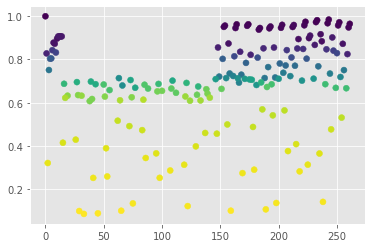

In [73]:
import matplotlib.pyplot as plt

cluster_ass = []
for key, val in clusters.items():
    for point in val:
        cluster_ass.append(key)
# print(cluster_ass,val)
points = []
for cluster_points in clusters.values():
    points += cluster_points
# data_points

# Extract the x and y coordinates of the data points
x_axis = [point[0] for point in points]
y_axis = [point[1] for point in points]

# Create a scatter plot with different colors for each cluster
plt.scatter(x_axis, y_axis, c=cluster_ass)
plt.show()


## Phase 3

In [176]:
swarm_size = 15

# Initalizaing the swarm
# Input: M feature clusters
# Output: N particles 

#selected probability for each cluster
max_list = list()
for values in clusters.values():
    max_list.append(values[0][1])
probabilities = list()
for values in max_list:
    probabilities.append(values/max_list[0])


M = len(list(clusters.keys()))
particles = np.zeros((swarm_size, M))
for i in range(swarm_size):
    for j in range(M):
        if random.uniform(0, 1) < probabilities[i]:
            index = random.randint(0, len(clusters[j+1])-1)
            particles[i][j] = clusters[j+1][index][1]
        else:
            particles[i][j] = 0

print(particles)

[[0.98463262 0.95768835 0.89434604 ... 0.07695241 0.04480017 0.03601529]
 [0.97284598 0.95768835 0.89886379 ... 0.09856889 0.04096416 0.01389279]
 [0.97284598 0.94825389 0.89886379 ... 0.10629037 0.06495011 0.01882041]
 ...
 [0.98172202 0.94656528 0.89886379 ... 0.09856889 0.         0.01244601]
 [0.97284598 0.95076633 0.89434604 ... 0.07695241 0.04461068 0.        ]
 [0.         0.96491921 0.91680627 ... 0.         0.04480017 0.02095483]]
